### Customer Churn Prediction

##### Problem Statement
Currently, ConnecTtel Telecom is having issues with customers retention strategies and precision leading to loss of valuable customers to competitors 

The aim of this project is to analyze ConnecTtel customer's data to understand and build a robust prediction system to accurately forcast customer churn to overcome this challenge and improve retention strategies.

The above will be implemented with the approaches below:
- Data Analysis
- Machine Learning

Conclusively, this model should be able to enhance customer loyalty, reduce customer attrition and maintain a competitive edge.

In [83]:
#import all libraries for data analysis
import pandas as pd
import numpy as np

#import all libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Pre-Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#importing predictive regression models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Split the DAtaFram into train and test datasets
from sklearn.model_selection import train_test_split

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
f1_score, roc_auc_score, classification_report, confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#import data for data processing
cust = pd.read_csv("Customer-Churn.csv")

In [3]:
#check that data has been imported
cust.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
#Review data information
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Observation 
- There are more categorical data than numerical data which means we will convert the data to a numerical value.
- Total Charges is an Object which should be converted to numeric data

In [5]:
#Convert Total Charges to float
cust['TotalCharges'][0]
cust['TotalCharges'] = pd.to_numeric(cust['TotalCharges'], errors = 'coerce')
cust['TotalCharges'] = cust['TotalCharges'].replace(np.NaN, 0)

In [6]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Observation 
Total Charges has been converted to float and the missing data on row 488 has been converted as well

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<Axes: >

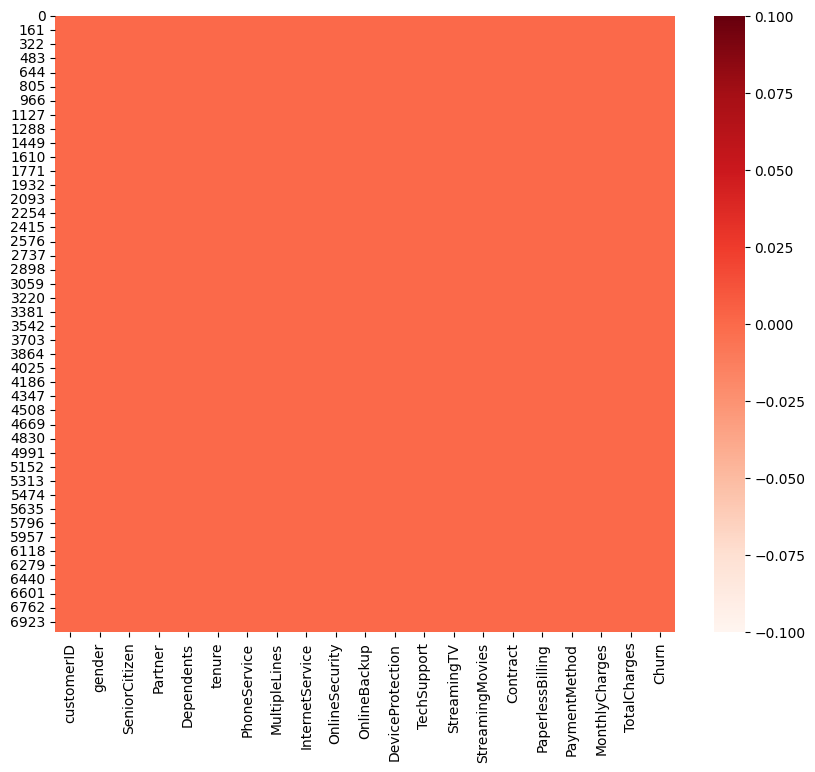

In [7]:
#Check for missing values
print(cust.isnull().sum())

#Visualizing missing values
plt.figure(figsize=(10,8))
sns.heatmap(cust.isnull(), cbar = True, cmap = "Reds")

In [8]:
#Check for the percentage of missing data
(cust.isnull().sum()/(len(cust)))*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [9]:
#Check for duplicated
cust.duplicated().sum()

0

##### Observation 
- From the given data there are no duplicated data and missing data

In [10]:
#check for numerical statical data
cust.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
#check for categorical statistics of data
cust.describe(exclude = ["int64", "float64"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### Data Cleaning Process

In [12]:
#Convert the Contract period to months where Month-to-month = 1 month, One year = 12months, Two year = 24 months
def ContractTime(Contract):
    if Contract == "Month-to-month":
        return 1
    elif Contract == "One year":
        return 12
    elif Contract == "Two year":
        return 24
    else:
        return 0

cust["ContractTime"] = cust["Contract"].apply(ContractTime)

In [13]:
#Make all required values Yes and No
cust['MultipleLines'] = cust['MultipleLines'].replace('No phone service', "No")
cust['OnlineSecurity'] = cust['OnlineSecurity'].replace('No internet service', "No")
cust['DeviceProtection'] = cust['DeviceProtection'].replace('No internet service', "No")
cust['TechSupport'] = cust['TechSupport'].replace('No internet service', "No")
cust['StreamingTV'] = cust['StreamingTV'].replace('No internet service', "No")
cust['StreamingMovies'] = cust['StreamingMovies'].replace('No internet service', "No")
cust['OnlineBackup'] = cust['OnlineBackup'].replace('No internet service', "No")

In [14]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
cust.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ContractTime
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,12
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,12
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [16]:
#Get the unique values for each 
print("Payment Method: ", cust.PaymentMethod.unique())
print("Internet Service: ", cust.InternetService.unique())

Payment Method:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Internet Service:  ['DSL' 'Fiber optic' 'No']


In [17]:
#Clean Payment Method Data
cust['PaymentMethod'].replace({'Bank transfer (automatic)':'Bank transfer', 'Credit card (automatic)': 'Credit card'}, inplace = True)

In [18]:
#Convert Payment Method to variables
def PaymentMethods(PaymentMethod):
    if PaymentMethod == "Electronic check":
        return 1
    elif PaymentMethod == "Mailed check":
        return 2
    elif PaymentMethod == "Bank transfer":
        return 3
    elif PaymentMethod == "Credit card":
        return 4
    else:
        return 0 

cust['PaymentMethods'] = cust['PaymentMethod'].apply(PaymentMethods)

In [19]:
#Convert Internet Service to variables
def InternetServices(InternetService):
    if InternetService == "DSL":
        return 1
    elif InternetService == "Fiber optic":
        return 2
    else: 
        return 0
cust["InternetServices"] = cust["InternetService"].apply(InternetServices)

In [20]:
#Convert Internet Service to variables
def SeniorCitizens(SeniorCitizen):
    if SeniorCitizen == 1:
        return "Yes"
    else: 
        return "No"
cust["SeniorCitizens"] = cust["SeniorCitizen"].apply(SeniorCitizens)

In [21]:
#Convert Gender to variables
def Genders(gender):
    if gender == "Male":
        return 1
    else: 
        return 2
cust["Genders"] = cust["gender"].apply(Genders)

In [22]:
#Convert Tenure to different period
def Tenures(tenure):
    if tenure <= 23:
        return "Tenure is <=23"
    elif tenure <= 47:
        return "Tenure is <=47"
    elif tenure <= 71:
        return "Tenure is <= 71"
    else:
        return "Tenure > 71"

cust["Tenures"] = cust["tenure"].apply(Tenures)

In [23]:
cust.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ContractTime,PaymentMethods,InternetServices,SeniorCitizens,Genders,Tenures
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,Electronic check,29.85,29.85,No,1,1,1,No,2,Tenure is <=23
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Mailed check,56.95,1889.50,No,12,2,1,No,1,Tenure is <=47


In [24]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Univariate Analysis

<Axes: xlabel='SeniorCitizens', ylabel='count'>

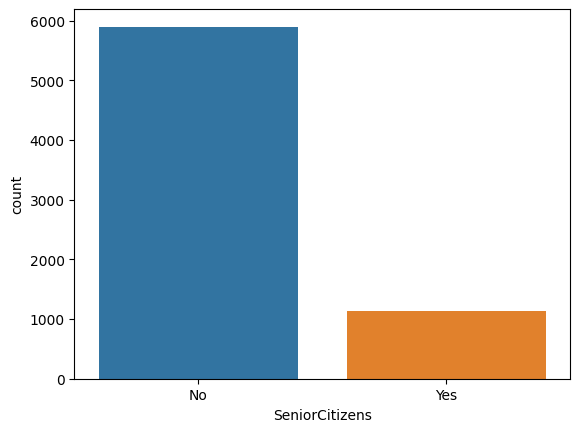

In [25]:
sns.countplot(x=cust['SeniorCitizens'])

##### Observation 
There are higher Non-SeniorCitizen compared to SeniorCitizen

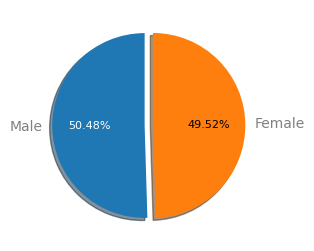

In [26]:
#sns.countplot(x=cust['gender'])
x= cust['gender'].value_counts()
y= ['Male', 'Female']

fig, ax = plt.subplots(figsize = (4, 3))
explode = (0, 0.09)
patches, texts, autotexts = ax.pie(x, labels = y, autopct = '%1.2f%%', shadow=True, startangle=90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size=8, color ='white')
autotexts[1].set_color('black')
plt.show()

### Observation 
Female are fairly less than the Male

In [27]:
cust["Churn"][cust["Churn"]=="Yes"].groupby(by=cust["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [28]:
cust["Churn"][cust["Churn"]=="No"].groupby(by=cust["gender"]).count()

gender
Female    2549
Male      2625
Name: Churn, dtype: int64

##### Observation on Gender

The marginal difference between male and female is quite small.\
However, the male is simily more than the female.

<Axes: xlabel='Partner', ylabel='count'>

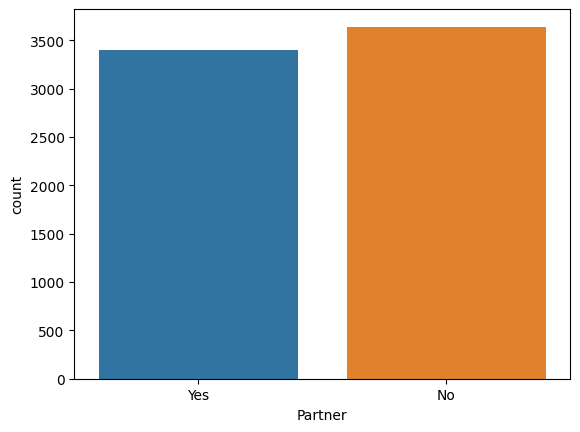

In [29]:
sns.countplot(x=cust['Partner'])

##### Observation 
There are more customers without partners than customers with partners

In [30]:
cust["Churn"][cust["Churn"]=="Yes"].groupby(by=cust["Partner"]).count()

Partner
No     1200
Yes     669
Name: Churn, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

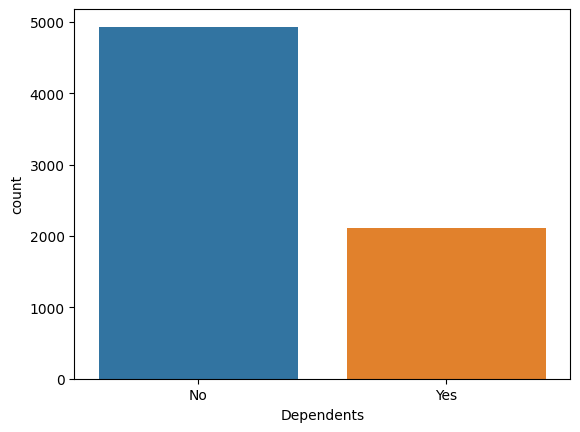

In [31]:
sns.countplot(x=cust["Dependents"])

##### Observation 
There are more customers without dependents 

<Axes: xlabel='PhoneService', ylabel='count'>

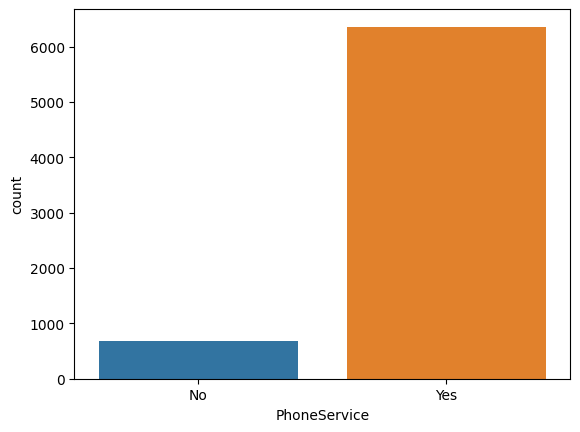

In [33]:
sns.countplot(x=cust['PhoneService'])

##### Observation
There are more customers who subscribe to Phone Services

<Axes: xlabel='MultipleLines', ylabel='count'>

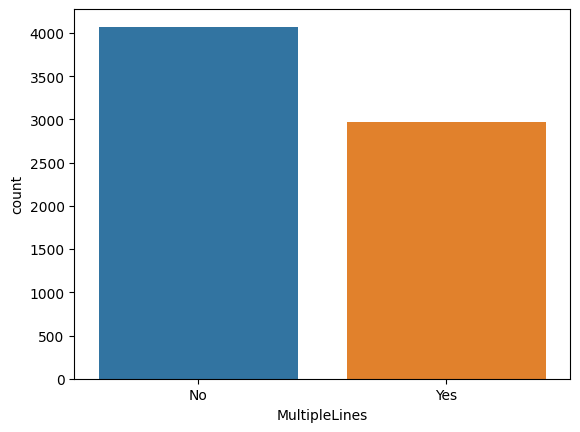

In [34]:
sns.countplot(x=cust['MultipleLines'])

##### Observation
There are more customers who subscribe to MultipleLines

<Axes: xlabel='PaymentMethod', ylabel='count'>

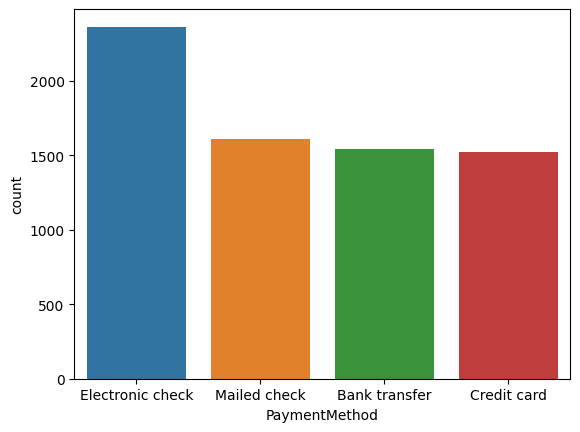

In [35]:
sns.countplot(x = cust['PaymentMethod'])

##### Observation 
Most customers use "Electronic Check" as their payment method

<Axes: xlabel='Contract', ylabel='count'>

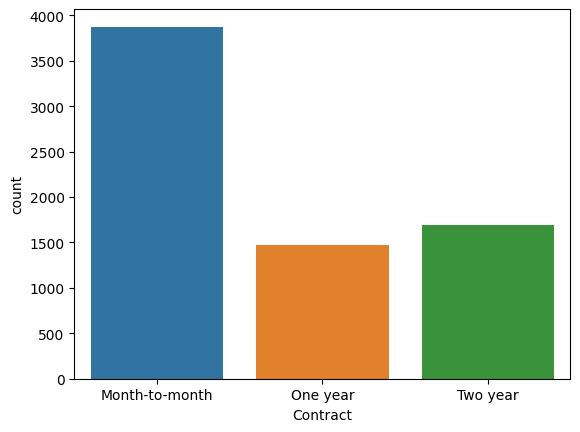

In [36]:
sns.countplot(x = cust['Contract'])

##### Observation 
There are more customers subscribing to month on month subscription

<Axes: xlabel='OnlineSecurity', ylabel='count'>

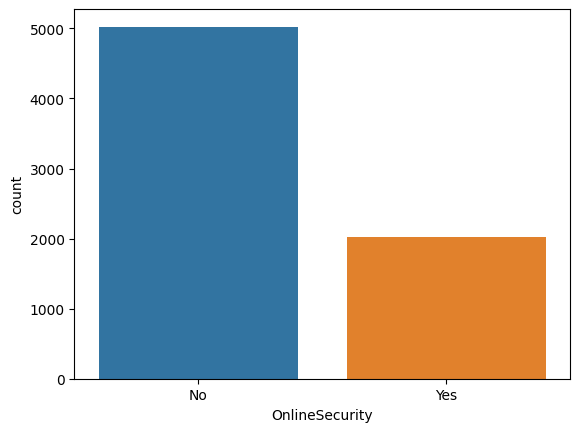

In [37]:
sns.countplot(x = cust['OnlineSecurity'])

##### Observation 
There are less customers using online security

<Axes: xlabel='OnlineBackup'>

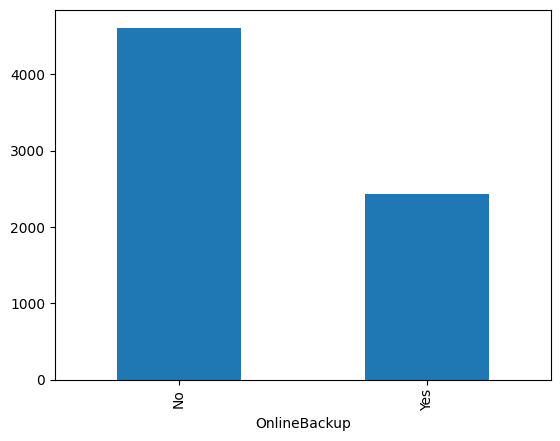

In [38]:
cust['OnlineBackup'].value_counts().head(10).plot.bar()

##### Observation
There are more customers not using Online Backup

<Axes: xlabel='InternetService'>

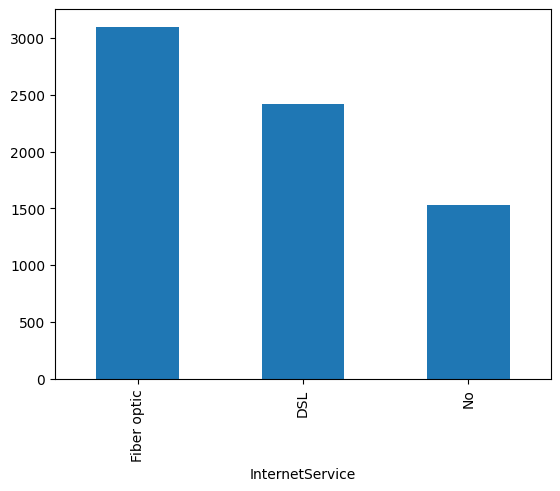

In [39]:
cust['InternetService'].value_counts().head(10).plot.bar()

##### Observation 
There are more customers using Fibre Optic than DSL and less customers not using the internet service

<Axes: xlabel='TechSupport'>

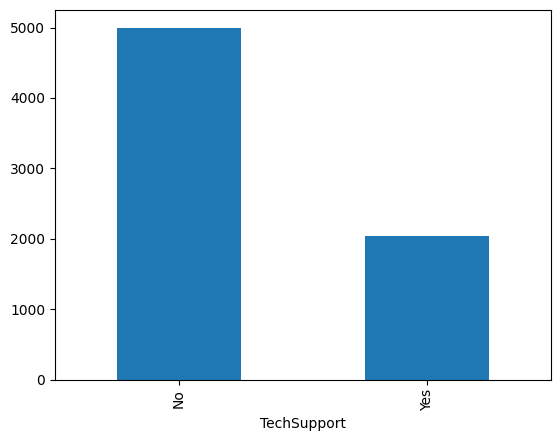

In [40]:
cust['TechSupport'].value_counts().head(10).plot.bar()

##### Observation
There are more customers that do not require TechSupport

<Axes: xlabel='DeviceProtection'>

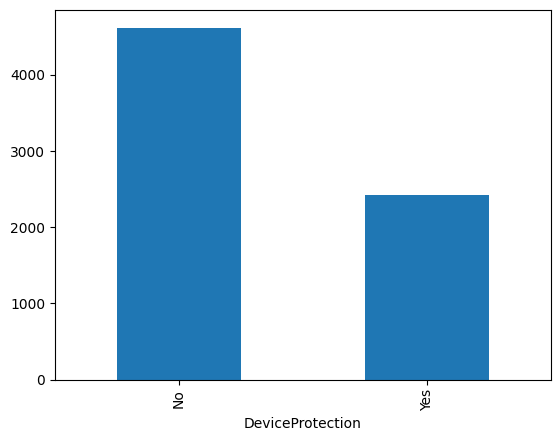

In [41]:
cust['DeviceProtection'].value_counts().head(10).plot.bar()

##### Observation
There are more customers that did not subscribe for Device protection

<Axes: xlabel='StreamingTV', ylabel='count'>

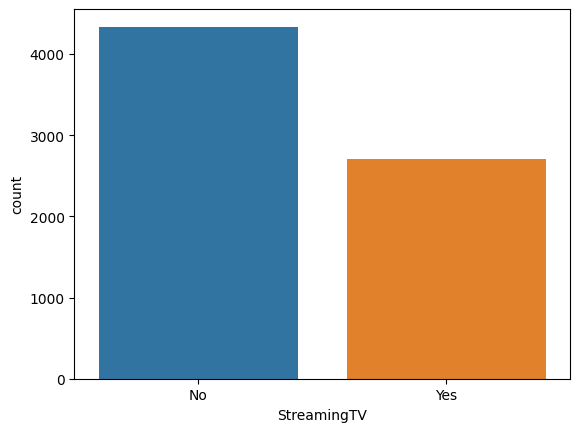

In [42]:
sns.countplot(x=cust['StreamingTV'])

##### Observation 
There are less customers using the streaming TV plan

<Axes: xlabel='StreamingMovies', ylabel='count'>

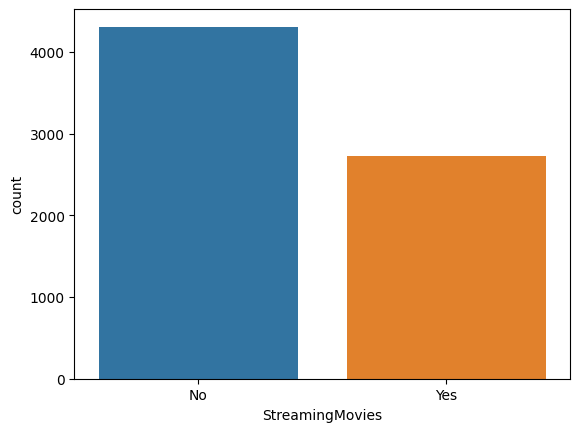

In [43]:
sns.countplot(x=cust['StreamingMovies'])

##### Observation 
There are less customers using the streaming movies plan

<Axes: xlabel='PaperlessBilling'>

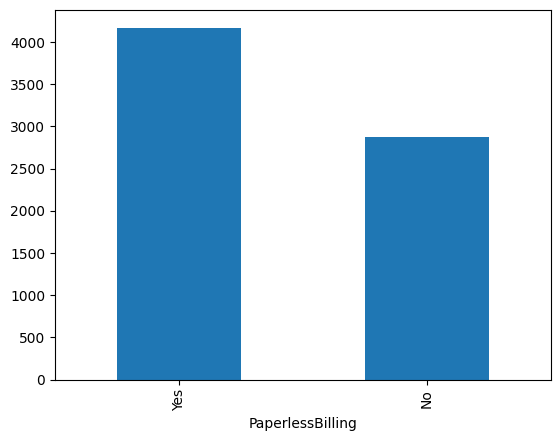

In [44]:
cust['PaperlessBilling'].value_counts().head(10).plot.bar()

##### Observation 
There are more customers using paperless billing

<Axes: xlabel='Tenures'>

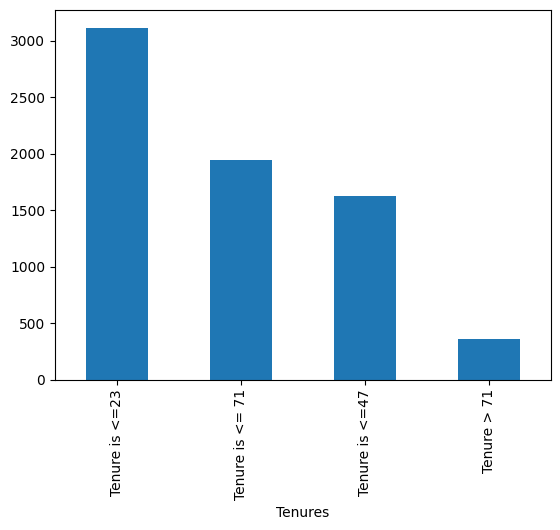

In [45]:
cust['Tenures'].value_counts().head(10).plot.bar()

##### Observation 
Tenures less than 23 is the longest duration

### Bivariate Analysis

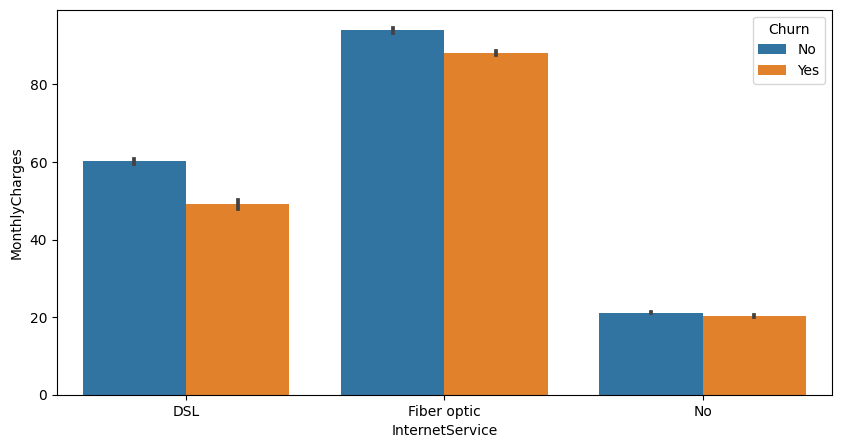

In [46]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'InternetService', y = 'MonthlyCharges', hue = 'Churn', data=cust)
plt.xlabel = 'Internet Service'
plt.ylabel = 'Monthly Charges'
plt.title = 'Monthly Charges for Internet Service'

#### Observation
The Fibre optic has a higher monthly charges more than other Internet Services \
Customers who subscribe to the fibre optic are more likely to churn

TypeError: 'str' object is not callable

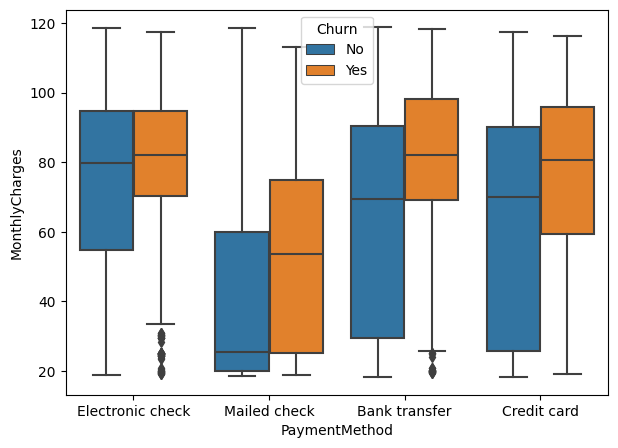

In [149]:
plt.figure(figsize = (7, 5))
sns.boxplot(x = 'PaymentMethod', y = 'MonthlyCharges', hue = 'Churn', data=cust)
plt.xlabel = "PaymentMethod"
plt.ylabel = "Monthly Charges"
plt.title("Monthly Charges for Payment Method")

#### Observation 
Electronic check has higher monthly charges than other payment method\
Electronic check, Bank Tansfer and Credit card customers have a higher churn rate

TypeError: 'str' object is not callable

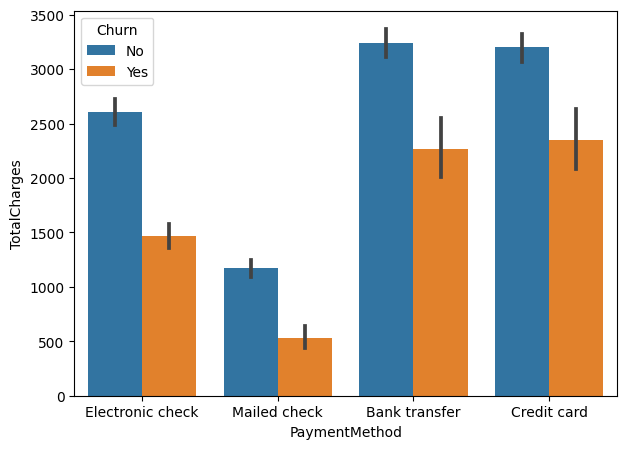

In [147]:
plt.figure(figsize=(7, 5))
sns.barplot(x='PaymentMethod', y = 'TotalCharges', hue = 'Churn', data=cust)
plt.xlabel("Payment Method")
plt.ylabel("Total Charges")
plt.title("PaymentMethod - TotalCharges Relationship")

#### Observation
Bank Transfer and Credit Card Total Charges are high and they have similar churn

TypeError: 'str' object is not callable

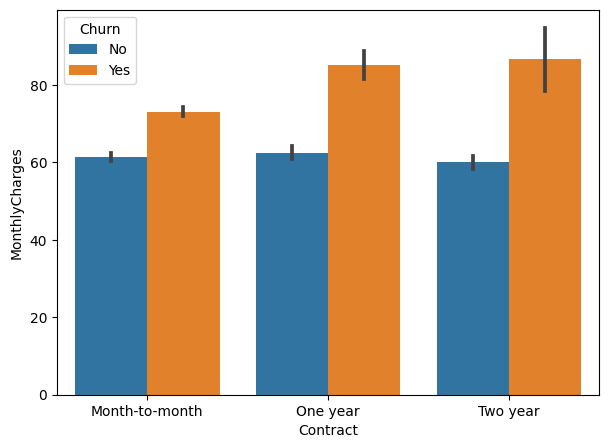

In [122]:
plt.figure(figsize=(7, 5))
sns.barplot(x = "Contract", y = "MonthlyCharges", hue = 'Churn', data=cust)
plt.xlabel ("Contract Duration")
plt.ylabel("Monthly Charges")
plt.title("Churn by Contract and Monthly Charges")

#### Observation
Month-to-month monthly charges are lower\
Customers who subscribe to One and Two year contract has similar churn rate

TypeError: 'str' object is not callable

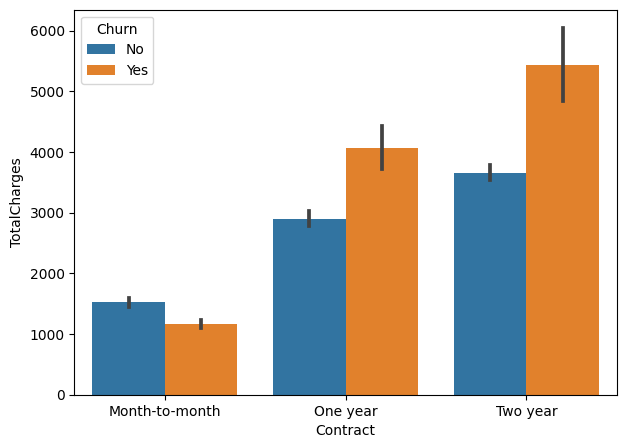

In [123]:
plt.figure(figsize=(7, 5))
sns.barplot(x = "Contract", y = "TotalCharges", hue = 'Churn', data=cust)
plt.xlabel ("Tenures")
plt.ylabel("Contract")
plt.show()

#### Observation
Two year total charges are higher and they have the most churn rate

TypeError: 'str' object is not callable

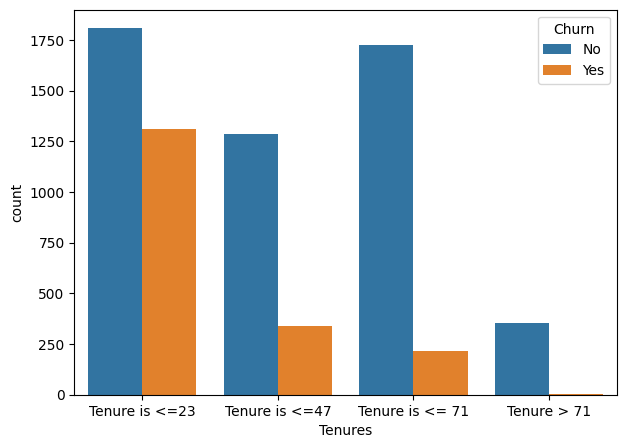

In [151]:
plt.figure(figsize=(7, 5))
sns.countplot(x = "Tenures", hue = 'Churn', data=cust)
plt.xlabel ("Customer Duration")
plt.ylabel("Count Tenure Duration")
plt.title("Total Count of Tenure", fontsize = 10)

#### Observation
Customers are mostly likely decide to stay or leave within 23days

TypeError: 'str' object is not callable

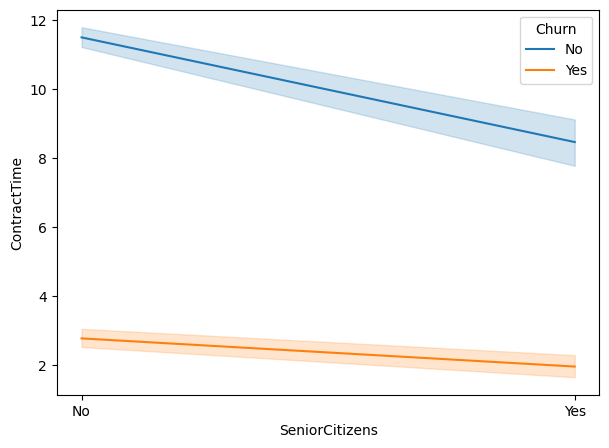

In [126]:
plt.figure(figsize=(7, 5))
sns.lineplot(x = "SeniorCitizens", y="ContractTime", hue = 'Churn', data=cust)
plt.xlabel ("Customer Duration")
plt.ylabel("Count Contract Period")
plt.title("Churn by Contract Time and Senior Citizens")

#### Observation 
The Senior Citizens are most likely to churn

TypeError: 'str' object is not callable

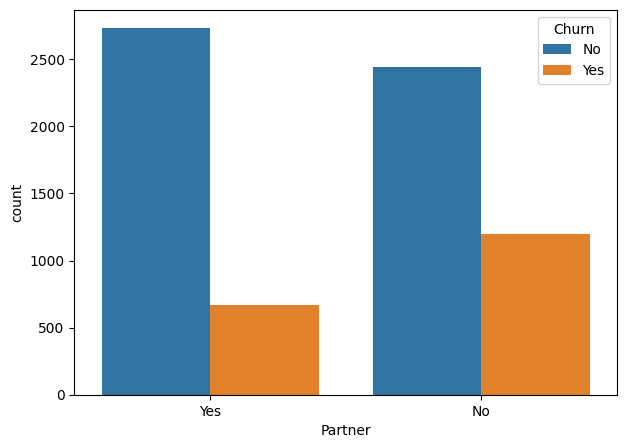

In [127]:
plt.figure(figsize=(7, 5))
sns.countplot(x = "Partner", hue = 'Churn', data=cust)
plt.xlabel ("Customer Churn rate by Partner")
plt.ylabel("Count of Partner")
plt.title("Churn by Partner")

### Observation 
Customers with Partners are most likely to Churn

TypeError: 'str' object is not callable

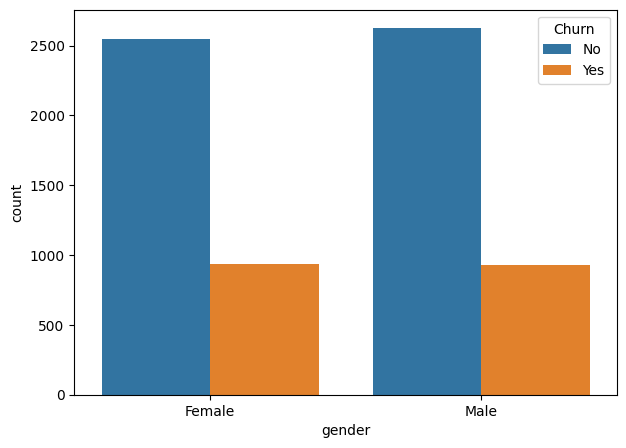

In [128]:
plt.figure(figsize=(7, 5))
sns.countplot(x = "gender", hue = 'Churn', data=cust)
plt.xlabel ("Customer Churn rate by Partner")
plt.ylabel("Count of Partner")
plt.title("Churn by Partner")

#### Observation 
Male and Female are most likely to churn at same rate

TypeError: 'str' object is not callable

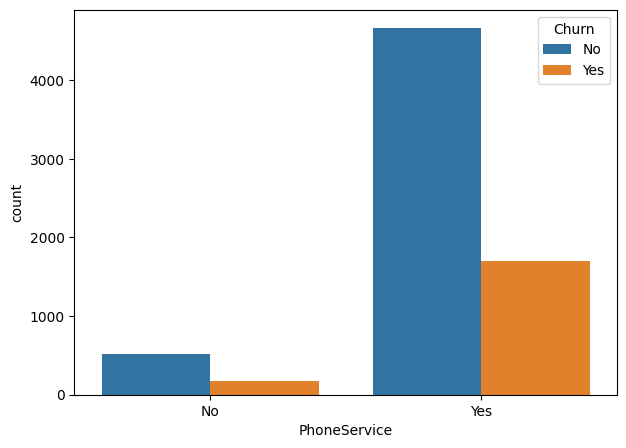

In [146]:
plt.figure(figsize=(7, 5))
sns.countplot(x = "PhoneService", hue = 'Churn', data=cust)
plt.xlabel ("Customer Churn rate by Phone Services")
plt.ylabel("Count of Phone Services")
plt.title("Churn by Phone Services")

### Observation 
Customers who subscribed to Phone Services are most likely to Churn

TypeError: 'str' object is not callable

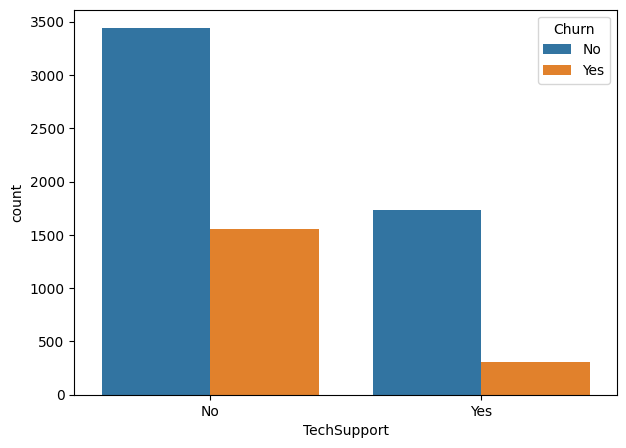

In [130]:
plt.figure(figsize=(7, 5))
sns.countplot(x = "TechSupport", hue = 'Churn', data=cust)
plt.xlabel ("Customer Churn rate by Tech Support")
plt.ylabel("Count of Tech Support")
plt.title("Churn by Tech Support")

#### Observation 
Customer who subscribe to Tech support are mostly likely

TypeError: 'str' object is not callable

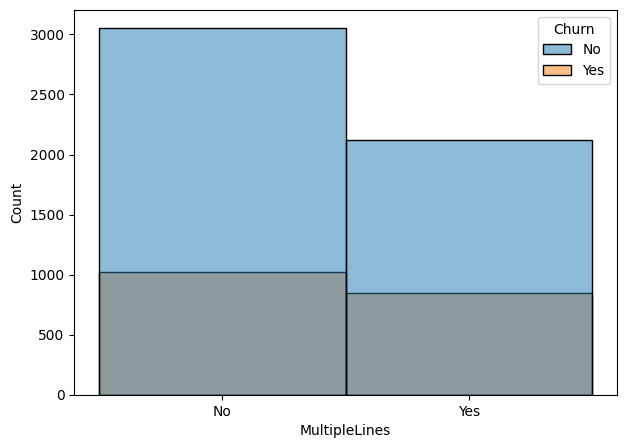

In [131]:
plt.figure(figsize=(7, 5))
sns.histplot(x = "MultipleLines", hue = 'Churn', data=cust)
plt.xlabel ("Customer Churn rate by Multiple Lines")
plt.ylabel("Count of Multiple Lines")
plt.title("Churn by Multiple Lines")

### Observation 
There is really not much significant difference, however customers who do not subscribe to multiple lines are likely to churn

TypeError: 'str' object is not callable

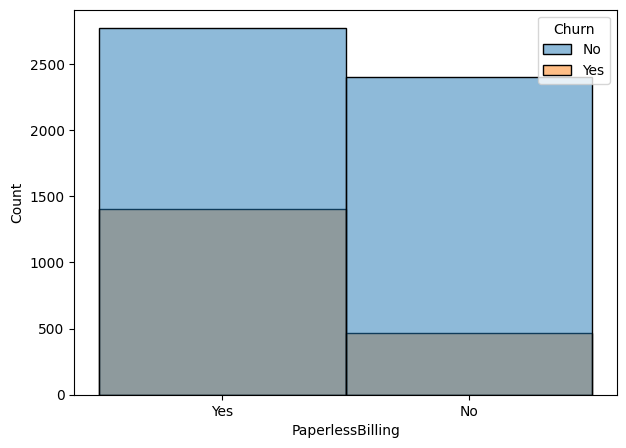

In [132]:
plt.figure(figsize=(7, 5))
sns.histplot(x = "PaperlessBilling", hue = 'Churn', data=cust)
plt.xlabel ("Customer Churn rate by Paperless Billing")
plt.ylabel("Count of Paperless Billing")
plt.title("Churn by Paperless Billing")

#### Observation 
Customer who subscribe to PaperlessBilling are mostly likely to churn

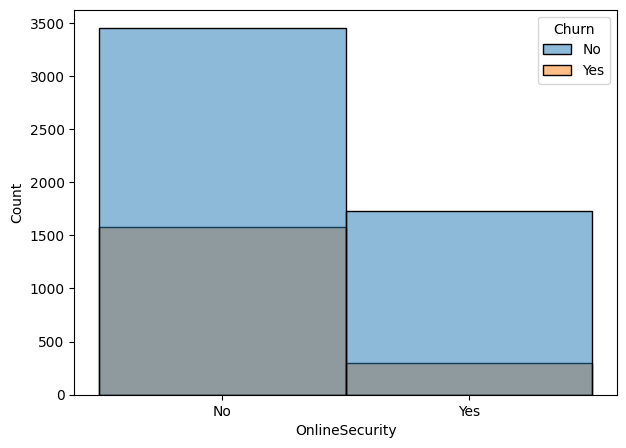

In [156]:
plt.figure(figsize=(7, 5))
sns.histplot(x = "OnlineSecurity", hue = 'Churn', data=cust)
plt.xlabel = "Churn by Online Security"
plt.ylabel = "Count of Online Security"
plt.title = "Customer Churn rate by OnlineSecurity"

#### Observation
Customers without Online Security are mostly likely to churn

In [ ]:
cust.plot(figsize=(14,6))
plt.xlabel= "ContractTime"
plt.ylabel = "The Contract Period"
plt.grid()
plt.show()

### Multivariate Analysis

In [56]:
cust.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'ContractTime', 'PaymentMethods', 'InternetServices', 'SeniorCitizens',
       'Genders', 'Tenures'],
      dtype='object')

In [57]:
# Copy dataset into new variable and drop the following tables in the new dataset - PaymentMethod, InternetService, Contract.
cust1 = cust.copy()
cust1 = cust1.drop(["customerID","gender", "Tenures","PaymentMethod","SeniorCitizens", "InternetService", "Contract"], axis='columns')

In [58]:
cust1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  PaperlessBilling  7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   object 
 16  ContractTime      7043 non-null   int64  


In [59]:
#label Encoding
labelEncoder = LabelEncoder()
cust1["Partner"] = labelEncoder.fit_transform(cust1["Partner"])
cust1["Dependents"] = labelEncoder.fit_transform(cust1["Dependents"])
cust1["PhoneService"] = labelEncoder.fit_transform(cust1["PhoneService"])
cust1["MultipleLines"] = labelEncoder.fit_transform(cust1["MultipleLines"])
cust1["OnlineSecurity"] = labelEncoder.fit_transform(cust1["OnlineSecurity"])
cust1["OnlineBackup"] = labelEncoder.fit_transform(cust1["OnlineBackup"])
cust1["DeviceProtection"] = labelEncoder.fit_transform(cust1["DeviceProtection"])
cust1["TechSupport"] = labelEncoder.fit_transform(cust1["TechSupport"])
cust1["StreamingTV"] = labelEncoder.fit_transform(cust1["StreamingTV"])
cust1["StreamingMovies"] = labelEncoder.fit_transform(cust1["StreamingMovies"])
cust1["PaperlessBilling"] = labelEncoder.fit_transform(cust1["PaperlessBilling"])
cust1["Churn"] = labelEncoder.fit_transform(cust1["Churn"])

In [60]:
cust1.head(3)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,ContractTime,PaymentMethods,InternetServices,Genders
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,1,1,2
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,12,2,1,1
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,2,1,1


<Axes: >

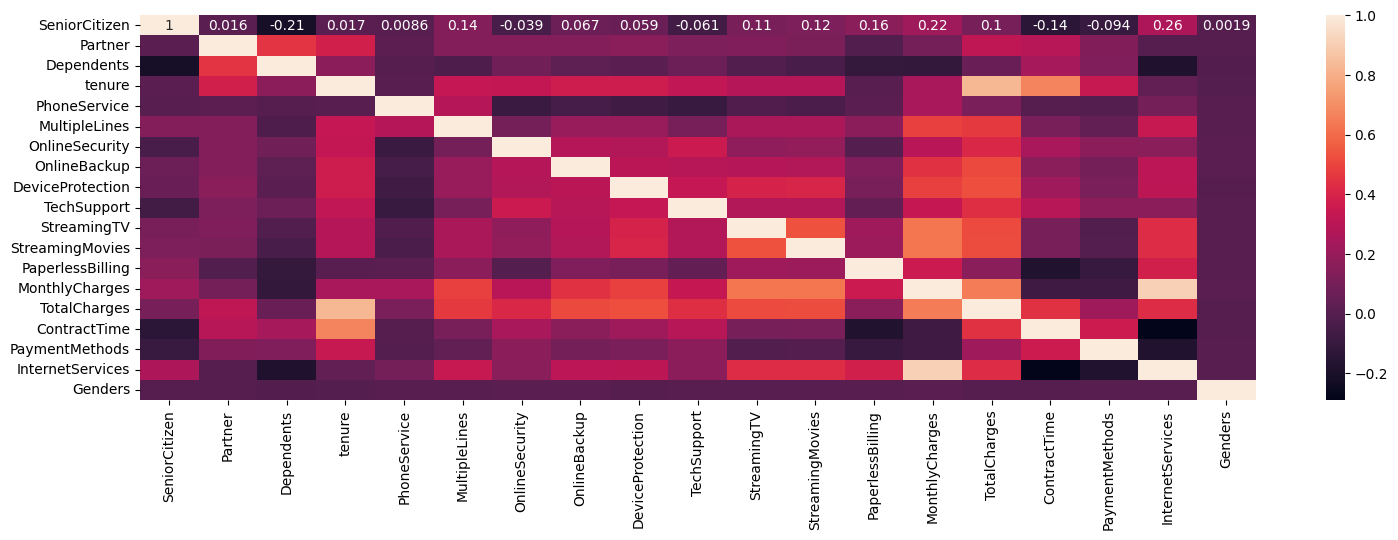

In [154]:
plt.figure(figsize = (18, 5))
sns.heatmap(cust1.corr(), cbar=True, annot = True)

#### Observation
There seems to be correlation between Internet Services and Monthly charges, Total charges and Tenure 

## Supervised Learning
We are basically going to be building and training a model that identifies the churn rate of customers. \
However, we are going to build the model and evaluate which works best for this kind of dataset

In [62]:
target = cust1.pop("Churn")

TypeError: 'str' object is not callable

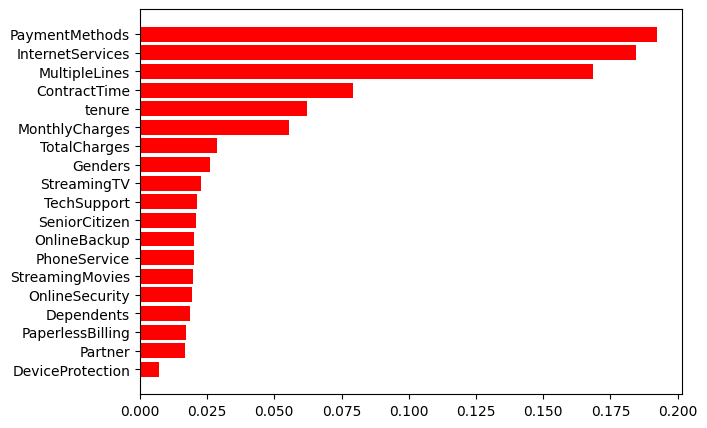

In [140]:
scaler = MinMaxScaler()
cust1_scaled = pd.DataFrame(scaler.fit_transform(cust1), columns = cust1.columns)

#The random forest classifier will be used to indetify key features for the model building
model = RandomForestClassifier()
model.fit(cust1_scaled, target)

#Create a variable to hold the name of the features
var_names = cust1.columns

#Model will learn features that are important
key_features = model.feature_importances_

#sort the important features in the specific manner 
sort_features = np.argsort(key_features)
var_names = var_names[sort_features]
sorted_features = key_features[sort_features]

#Plotting a feature importance chart
plt.figure(figsize=(7, 5))
plt.barh(range(len(sorted_features)), sorted_features, color='red', align='center')

#We want to get the feature names
plt.yticks(range(len(var_names)), [var_names[i] for i in sort_features])
plt.xlabel("Relative Importance Chart")
plt.title("Feature Importance")
plt.show()

#### Observation
The important feature for the training of these model are Payment Methods, InternetService, MultipleLines, ContractInterval, Tenure, Monthly Charges

In [64]:
x_train, x_test, y_train, y_test = train_test_split(cust1_scaled, target, test_size=0.2, random_state = 1)
x_test.head(3)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,ContractTime,PaymentMethods,InternetServices,Genders
3381,0.0,0.0,0.0,0.569444,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.612935,0.382363,0.478261,0.666667,0.5,1.0
6180,1.0,0.0,0.0,0.916667,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.837313,0.745193,1.000000,0.666667,1.0,1.0
4829,0.0,0.0,0.0,0.166667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.266169,0.060376,0.000000,0.666667,0.5,1.0


In [66]:
#Random Forest Classifer

model.fit(x_train, y_train)
model_pred = model.predict(x_test)

#Evaluating Random Forest Classifer

print('Accuracy:', accuracy_score(y_test, model_pred))
print('Precision:', precision_score(y_test, model_pred))
print('Recall:', recall_score(y_test, model_pred))
print('F1_Score:', f1_score(y_test, model_pred))
print('AUC_ROC:', roc_auc_score(y_test, model_pred))

Accuracy: 0.8076650106458482
Precision: 0.6270627062706271
Recall: 0.5459770114942529
F1_Score: 0.5837173579109063
AUC_ROC: 0.7197368563597559


TypeError: 'str' object is not callable

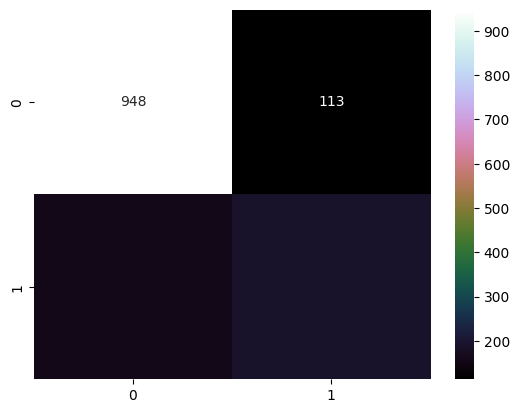

In [108]:
#Create Confusion Matrix for Random Forest Classifer
lcm = confusion_matrix(y_test, model_pred)

#Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap = "cubehelix", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [78]:
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1061
           1       0.63      0.55      0.58       348

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [67]:
#Logistic Regression 
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
log_pred = logreg.predict(x_test)

#Evaluating logistic Regression

print('Accuracy:', accuracy_score(y_test, log_pred))
print('Precision:', precision_score(y_test, log_pred))
print('Recall:', recall_score(y_test, log_pred))
print('F1_Score:', f1_score(y_test, log_pred))
print('AUC_ROC:', roc_auc_score(y_test, log_pred))

Accuracy: 0.8076650106458482
Precision: 0.6184615384615385
Recall: 0.5775862068965517
F1_Score: 0.5973254086181278
AUC_ROC: 0.7303576651824888


TypeError: 'str' object is not callable

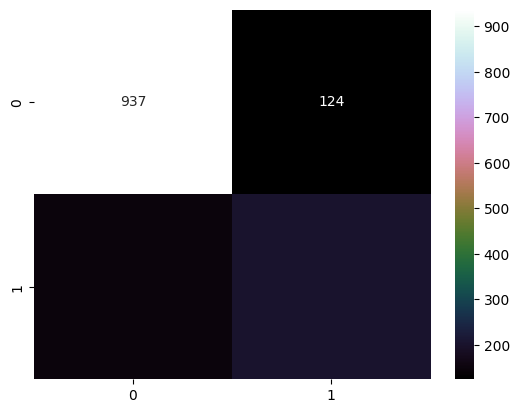

In [107]:
#Create Confusion Matrix for Logistic Regression 
lcm = confusion_matrix(y_test, log_pred)

#Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap = "cubehelix", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [79]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.62      0.58      0.60       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



In [70]:
#Decision Tree Classifier
dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)
dct_pred = dct.predict(x_test)

#Evaluating Decision Tree Classifier

print('Accuracy:', accuracy_score(y_test, dct_pred))
print('Precision:', precision_score(y_test, dct_pred))
print('Recall:', recall_score(y_test, dct_pred))
print('F1_Score:', f1_score(y_test, dct_pred))
print('AUC_ROC:', roc_auc_score(y_test, dct_pred))

Accuracy: 0.7359829666430092
Precision: 0.47073170731707314
Recall: 0.5545977011494253
F1_Score: 0.5092348284960422
AUC_ROC: 0.6750368336095853


TypeError: 'str' object is not callable

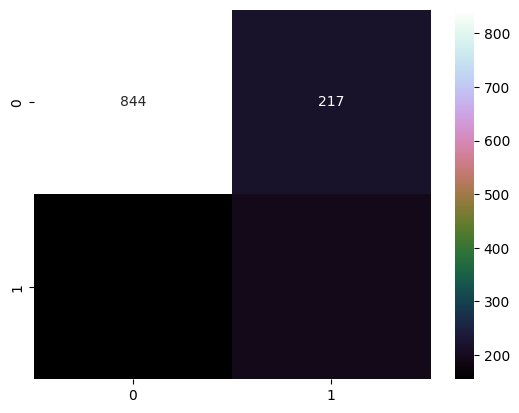

In [106]:
#Create Confusion Matrix for Decision Tree Classifier
lcm = confusion_matrix(y_test, dct_pred)

#Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap = "cubehelix", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [77]:
print(classification_report(y_test, dct_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1061
           1       0.47      0.55      0.51       348

    accuracy                           0.74      1409
   macro avg       0.66      0.68      0.66      1409
weighted avg       0.75      0.74      0.74      1409



In [84]:
#Gradient Booster Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_pred = gbc.predict(x_test)

#Evaluating Gradient Booster Classifier

print('Accuracy:', accuracy_score(y_test, gbc_pred))
print('Precision:', precision_score(y_test, gbc_pred))
print('Recall:', recall_score(y_test, gbc_pred))
print('F1_Score:', f1_score(y_test, gbc_pred))
print('AUC_ROC:', roc_auc_score(y_test, gbc_pred))

Accuracy: 0.8048261178140526
Precision: 0.6166134185303515
Recall: 0.5545977011494253
F1_Score: 0.583963691376702
AUC_ROC: 0.7207484264465317


TypeError: 'str' object is not callable

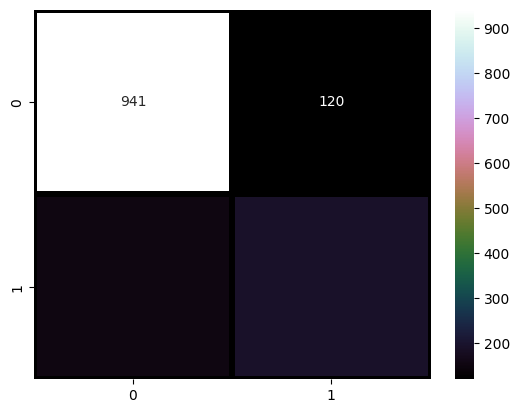

In [105]:
#Create Confusion Matrix for Gradient Booster Classifier
lcm = confusion_matrix(y_test, gbc_pred)

#Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap ="cubehelix", linecolor = 'k', linewidths = 4, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [109]:
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1061
           1       0.62      0.55      0.58       348

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409

